In [1]:
import os
import itertools
import tempfile
import warnings
import pandas as pd
import qiime2 as q2
import numpy as np
from biom import load_table, Table
#from qiime2.plugins.sourcetracker2.actions import gibbs
from qiime2.plugins.feature_table.actions import rarefy

# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

def temporal_plot(x_axis, y_axis, df, ax, title, x_label, y_label,
                  title_fontsize, x_fontsize, y_fontsize, hue=None,
                  style=None, size=None, min_x = 0, max_x = 35, err_style='band', 
                  ci=95, cmap='tab10', style_order=None, dashes_=True):

    """

    This wrapper creates beautiful timeseries plots using
    seaborn and matplotlib. 

    Parameters
    ----------
    x_axis : str, required
        X-axis catagory in dataframe -- data
        
    y_axis : str, required
        y-axis catagory in dataframe -- data
        
    df : dataframe, required
        dataframe of data to plot
    
    ax : matplotlib figure object, required
        panel object from matplotlib figure 
    
    title : str, required
        panel title
    
    x_label : str, required
        x label panel title
    
    y_label : str, required
        y label panel title
        
    title_fontsize : int, required
    x_fontsize : int, required
    y_fontsize : int, required
        font sizes 
    
    hue : str, optional
        color by catagory in dataframe -- data
        
    style : str, optional
        style by catagory in dataframe -- data
    
    Returns
    ----------
    matplotlib figure object

    """
    

    # Lineplot across time 
    sns.lineplot(x=x_axis,
                 y=y_axis,
                 hue=hue,
                 style=style,
                 dashes=dashes_,
                 ci=ci,
                 sort=True,
                 markers=style_order,
                 estimator=np.mean,
                 err_style=err_style,
                 palette=cmap,
                 data=df,
                 ax=ax)
    
    
    
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xlabel(x_label, color='#000000',
                  fontsize=x_fontsize)
    ax.set_ylabel(y_label, color='#000000',
                  fontsize=y_fontsize, labelpad=0)
    
    # remove all grids, backrounds etc ...
    ax.legend_.remove()        
    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_bounds(min_x, max_x)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('grey')

    return ax


### Collect sources for tacking

Redbiom code is skipped here. 

In [2]:
# run redbiom
!redbiom search metadata "where empo_1 == 'Free-living' and emp_release1 == 'True'" \
    | redbiom summarize samples --category empo_3  | head
!redbiom search metadata "where empo_3 == 'Sterile water blank' and emp_release1 == 'True'" \
    | redbiom summarize samples --category empo_3  | head
!redbiom search metadata "where qiita_study_id == 10317 and qiita_empo_3 == 'Animal distal gut'" \
    | redbiom summarize samples --category qiita_empo_3  | head
!redbiom search metadata "where qiita_study_id == 10317 and qiita_empo_3 == 'Animal surface'" \
    | redbiom summarize samples --category qiita_empo_3  | head
!redbiom search metadata "where qiita_study_id == 10317 and qiita_empo_3 == 'Animal secretion'" \
    | redbiom summarize samples --category qiita_empo_3  | head
# comment this section -- unless you want to rebuild the table, which is heavy compute
"""
!redbiom search metadata "where empo_1 == 'Free-living' and emp_release1 == 'True'" \
    > ../data/emp-ag-sources/source-samples.txt
!redbiom search metadata "where empo_3 == 'Sterile water blank' and emp_release1 == 'True'" \
    >> ../data/emp-ag-sources/source-samples.txt
!redbiom search metadata "where qiita_study_id == 10317 and qiita_empo_3 == 'Animal distal gut'" \
    | head -2000 >> ../data/emp-ag-sources/source-samples.txt
!redbiom search metadata "where qiita_study_id == 10317 and qiita_empo_3 == 'Animal surface'" \
    >> ../data/emp-ag-sources/source-samples.txt
!redbiom search metadata "where qiita_study_id == 10317 and qiita_empo_3 == 'Animal secretion'" \
    >> ../data/emp-ag-sources/source-samples.txt
!redbiom fetch sample-metadata  --from ../data/emp-ag-sources/source-samples.txt\
                       --context 'Deblur-Illumina-16S-V4-150nt-780653'\
                       --output ../data/emp-ag-sources/source-metadata.txt\
                       --resolve-ambiguities\
                       --all-columns
!redbiom fetch samples --from ../data/emp-ag-sources/source-samples.txt\
                       --context 'Deblur-Illumina-16S-V4-150nt-780653'\
                       --output ../data/emp-ag-sources/source-table.biom\
                       --resolve-ambiguities most-reads
!qiime tools import --input-path ../data/emp-ag-sources/source-table.biom\
                    --output-path ../data/emp-ag-sources/sources-table.qza\
                    --type "FeatureTable[Frequency]"
!qiime feature-table merge --i-tables ../data/emp-ag-sources/sources-table.qza\
                           --i-tables ../data/16S/data-subsets/pma-treatment-table.qza\
                           --o-merged-table ../data/emp-ag-sources/merged-table.qza
"""


Soil (non-saline)	4506
Water (non-saline)	3226
Surface (non-saline)	1179
Sediment (saline)	623
Water (saline)	612
Surface (saline)	136
Aerosol (non-saline)	89
Sediment (non-saline)	71
Hypersaline (saline)	13

Sterile water blank	213

Total samples	213
Animal distal gut	10668

Total samples	10668
Animal surface	669

Total samples	669
Animal secretion	931

Total samples	931


'\n!redbiom search metadata "where empo_1 == \'Free-living\' and emp_release1 == \'True\'"     > ../data/emp-ag-sources/source-samples.txt\n!redbiom search metadata "where empo_3 == \'Sterile water blank\' and emp_release1 == \'True\'"     >> ../data/emp-ag-sources/source-samples.txt\n!redbiom search metadata "where qiita_study_id == 10317 and qiita_empo_3 == \'Animal distal gut\'"     | head -2000 >> ../data/emp-ag-sources/source-samples.txt\n!redbiom search metadata "where qiita_study_id == 10317 and qiita_empo_3 == \'Animal surface\'"     >> ../data/emp-ag-sources/source-samples.txt\n!redbiom search metadata "where qiita_study_id == 10317 and qiita_empo_3 == \'Animal secretion\'"     >> ../data/emp-ag-sources/source-samples.txt\n!redbiom fetch sample-metadata  --from ../data/emp-ag-sources/source-samples.txt                       --context \'Deblur-Illumina-16S-V4-150nt-780653\'                       --output ../data/emp-ag-sources/source-metadata.txt                       --resolve

### merge metadata and add source/sink labels

skip this step unless also run previous redbiom code.

In [195]:
"""# import metdata
sink_metadata = q2.Metadata.load('../data/16S/data-subsets/pma-treatment-metadata.qza')
source_metadata = q2.Metadata.load('../data/emp-ag-sources/source-metadata.txt')
all_index = list(sink_metadata.to_dataframe().index) \
                +  list(source_metadata.to_dataframe().index)

# import table
table = q2.Artifact.load('../data/emp-ag-sources/merged-table.qza')
#filter the table
bt = table.view(Table)
# make new ids
new_ids = {}
for id_ in bt.ids():
    if 'PMA' in id_:
        new_ids[id_] = id_
        continue
    n_id = '.'.join(id_.split('.')[:-1])
    if n_id not in new_ids.values():
        new_ids[id_] = n_id
# filter ids
bt = bt.filter(new_ids.keys())
bt = bt.update_ids(new_ids, axis='sample')
bt = bt.filter(list(set(all_index) \
                    & set(bt.ids())))
#filter the table
_, n_samples = bt.shape
min_feature_frequency = 0.1
# filter features by N samples presence
def frequency_filter(val, id_, md):
    return (np.sum(val > 0) / n_samples) \
            > (min_feature_frequency / 100)
# filter and import table for each filter above
bt = bt.filter(frequency_filter, axis='observation')
# rarefy
table_filtered = q2.Artifact.import_data('FeatureTable[Frequency]',
                                         bt)
table_filtered_rare = rarefy(table_filtered, 2000)
table_filtered_rare = table_filtered_rare.rarefied_table

# make sink metdadata
sink_mf = sink_metadata.to_dataframe()
sink_mf['source_environment'] = sink_mf['jpl_location_area']
sink_mf['source_sink_type'] = 'Sink'
sink_mf['host_subject_id'] = sink_mf['host_subject_id']
# make source metdadata
source_mf = source_metadata.to_dataframe()
source_mf['source_environment'] = [sorted([str(x),str(y)])[0]
                                   for x,y in zip(source_mf.qiita_empo_3,
                                                  source_mf.empo_3)]
source_mf['source_sink_type'] = 'Source'
source_mf['host_subject_id'] = ['subject_%i' % (i)
                                for i in range(source_mf.shape[0])]
# merge it
keep_ = ['source_environment','source_sink_type','host_subject_id']
merged_metdata = pd.concat([source_mf[keep_], sink_mf[keep_]], axis=0)
# match it
match_ids = table_filtered_rare.view(Table).ids()
merged_metdata = q2.Metadata(merged_metdata.reindex(match_ids))
merged_metdata.save('../data/emp-ag-sources/final-merged-metdata.qza')
table_filtered_rare.save('../data/emp-ag-sources/final-merged-filtered-rar2000-table.qza')
table_filtered_rare.view(Table)"""


102376 x 10139 <class 'biom.table.Table'> with 3265801 nonzero entries (0% dense)

### microbial source tracking

Tracking step skipped - large computational cost.

In [3]:
# run this on the cluster
"""
qiime sourcetracker2 gibbs\
        --i-feature-table jpl/source-tracking/data/final-merged-filtered-rar2000-table.qza\
        --m-sample-metadata-filejpl/source-tracking/data/final-merged-metdata.qza\
        --p-jobs 20\
        --p-source-rarefaction-depth 0\
        --p-sink-rarefaction-depth 0\
        --p-source-sink-column "source_sink_type"\
        --p-source-column-value "Source"\
        --p-sink-column-value "Sink"\
        --p-source-category-column "source_environment"\
        --output-dir jpl/source-tracking/results/st2res5
"""

'\nqiime sourcetracker2 gibbs        --i-feature-table /home/cmartino/jpl/source-tracking/data/final-merged-filtered-rar2000-table.qza        --m-sample-metadata-file /home/cmartino/jpl/source-tracking/data/final-merged-metdata.qza        --p-jobs 20        --p-source-rarefaction-depth 0        --p-sink-rarefaction-depth 0        --p-source-sink-column "source_sink_type"        --p-source-column-value "Source"        --p-sink-column-value "Sink"        --p-source-category-column "source_environment"        --output-dir /home/cmartino/jpl/source-tracking/results/st2res5\n'

In [2]:
stmp = q2.Artifact.load('../results/intermediates/st2res2/mixing_proportions.qza')
sink_metadata = q2.Metadata.load('../data/16S/data-subsets/pma-treatment-metadata.qza')
sink_metadata = sink_metadata.to_dataframe()

x_org = 150
y_org = 600
radius = np.sqrt((x_org - sink_metadata['jpl_x'])**2\
                 + (y_org - sink_metadata['jpl_y'])**2)
sink_metadata['radius'] = radius.values

stmpdf = stmp.view(q2.Metadata).to_dataframe().T
stmerged = pd.concat([stmpdf, sink_metadata], axis=1)
stmerged.head(3)


,Animal distal gut,Animal secretion,Animal surface,Sediment (non-saline),Sediment (saline),Soil (non-saline),Surface (non-saline),Surface (saline),Water (non-saline),Water (saline),...,tm300_8_tool,tm50_8_tool,water_lot,weight,weight_units,well_id,Description,jpl_x,jpl_y,radius
10849.set1.FC2.PMA,0.00010,0.00020,0.29645,0.00000,0.00015,0.22435,0.17155,0.00515,0.00115,0.0002,...,3076189.0,409172Z,RNBD9959,unknown,unknown,D11,set1_set1.FC2.PMA_D11,NaN,NaN,NaN
10849.set1.FC3.PMA,0.00025,0.00065,0.21825,0.00005,0.00005,0.22255,0.16755,0.00860,0.01790,0.0001,...,3076189.0,409172Z,RNBD9959,unknown,unknown,E11,set1_set1.FC3.PMA_E11,NaN,NaN,NaN
10849.set1.FC4.PMA,0.00000,0.00020,0.21900,0.00020,0.00015,0.20340,0.19405,0.00590,0.00765,0.0000,...,3076189.0,409172Z,RNBD9959,unknown,unknown,F11,set1_set1.FC4.PMA_F11,NaN,NaN,NaN


In [3]:
map_col_ = ['radius', 'jpl_location_area', 'time_numerical']
map_col = {i:stmerged.loc[i, map_col_].values for i in stmerged.index}
ststacked = stmerged[stmpdf.columns].stack(dropna=False).reset_index()
add_ = pd.DataFrame([map_col[i] for i in ststacked.level_0])
ststacked = pd.concat([ststacked, add_], axis=1)
ststacked.columns = ['subject_id', 'source', 'mixing_proportion']\
                    + map_col_
ststacked['time_numerical'] = ststacked['time_numerical'].astype(int)
ststacked.head(3)


,subject_id,source,mixing_proportion,radius,jpl_location_area,time_numerical
0,10849.set1.FC2.PMA,Animal distal gut,0.00010,NaN,field control,2
1,10849.set1.FC2.PMA,Animal secretion,0.00020,NaN,field control,2
2,10849.set1.FC2.PMA,Animal surface,0.29645,NaN,field control,2


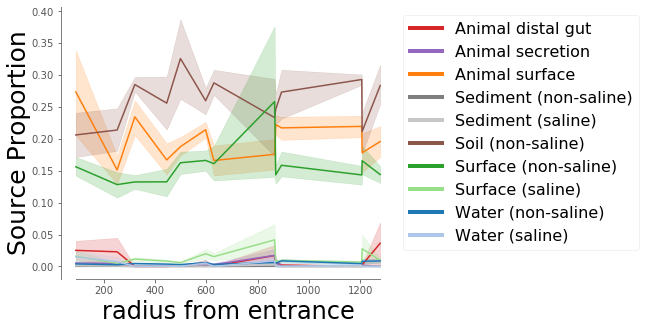

In [4]:
group_colors = {'Animal distal gut':'#d62728',
                 'Animal secretion':'#9467bd',
                 'Animal surface':'#ff7f0e',
                 'Sediment (non-saline)':'#7f7f7f',
                 'Sediment (saline)':'#c7c7c7',
                 'Soil (non-saline)':'#8c564b',
                 'Surface (non-saline)':'#2ca02c',
                 'Surface (saline)':'#98df8a',
                 'Water (non-saline)':'#1f77b4',
                 'Water (saline)':'#aec7e8',
                 'negative control':'#17becf'}
fig, ax = plt.subplots(1,1,figsize=(6,5))
time_='radius'
label='Source Proportion'
ststacked_plot = ststacked[~ststacked.source.isin(['Unknown'])]
ststacked_plot['radius'] = ststacked_plot['radius'].astype(float)
ststacked_plot = ststacked_plot[~ststacked_plot.jpl_location_area.isin(['field control',
                                                                        'negative control'])]

temporal_plot(time_, 'mixing_proportion',
              ststacked_plot,
              ax, '',
              'radius from entrance', label,
              24, 24, 25, hue='source',
              min_x = ststacked_plot[time_].min(),
              max_x = ststacked_plot[time_].max(),
              err_style='band', 
              ci=68, cmap=group_colors,
              style_order=None,
              dashes_=True)
#ax.set_ylim(-1.1,1.1)
    
# generate legend from last iterations     
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[1:], labels[1:], loc=2, 
                         bbox_to_anchor=(1.0, 1.0),
                         prop={'size':16},
                         fancybox=True, framealpha=0.5, 
                         ncol=1, markerscale=3,
                         facecolor="white")


# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(8.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(4.0)
# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)


# save the figure to file
plt.savefig('../results/figures/st-radius.pdf',
            dpi=600, 
            bbox_inches='tight',
            edgecolor='none')

plt.show()

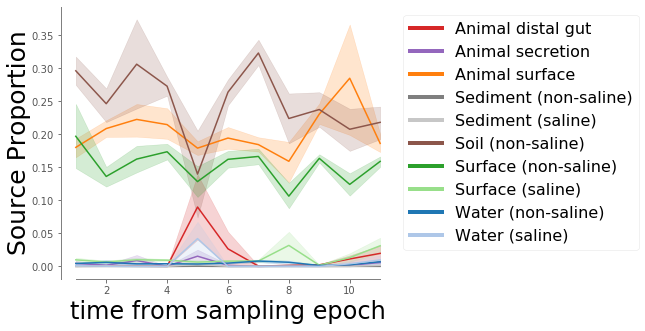

In [6]:
group_colors = {'Animal distal gut':'#d62728',
                 'Animal secretion':'#9467bd',
                 'Animal surface':'#ff7f0e',
                 'Sediment (non-saline)':'#7f7f7f',
                 'Sediment (saline)':'#c7c7c7',
                 'Soil (non-saline)':'#8c564b',
                 'Surface (non-saline)':'#2ca02c',
                 'Surface (saline)':'#98df8a',
                 'Water (non-saline)':'#1f77b4',
                 'Water (saline)':'#aec7e8',
                 'negative control':'#17becf'}
fig, ax = plt.subplots(1,1,figsize=(6,5))
time_='time_numerical'
label='Source Proportion'
ststacked_plot = ststacked[~ststacked.source.isin(['Unknown'])]
ststacked_plot['radius'] = ststacked_plot['radius'].astype(float)
ststacked_plot = ststacked_plot[~ststacked_plot.jpl_location_area.isin(['field control',
                                                                        'negative control'])]

temporal_plot(time_, 'mixing_proportion',
              ststacked_plot,
              ax, '',
              'time from sampling epoch', label,
              24, 24, 25, hue='source',
              min_x = ststacked_plot[time_].min(),
              max_x = ststacked_plot[time_].max(),
              err_style='band', 
              ci=68, cmap=group_colors,
              style_order=None,
              dashes_=True)
#ax.set_ylim(-1.1,1.1)
    
# generate legend from last iterations     
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[1:], labels[1:], loc=2, 
                         bbox_to_anchor=(1.0, 1.0),
                         prop={'size':16},
                         fancybox=True, framealpha=0.5, 
                         ncol=1, markerscale=3,
                         facecolor="white")


# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(8.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(4.0)
# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)


# save the figure to file
plt.savefig('../results/figures/st-time.pdf',
            dpi=600, 
            bbox_inches='tight',
            edgecolor='none')

plt.show()